# Seaborn 230130 파이썬에서 차트나 플롯을 시각화하는 패키지

씨본은 차트나 플롯을 시각화하는 패키지

matplotlib을 기반으로 다양한 색상 테마 사용 가능

seaborn.countplot
팔레트 색상을 더 많이 갖고 있었다


<AxesSubplot: xlabel='age'>

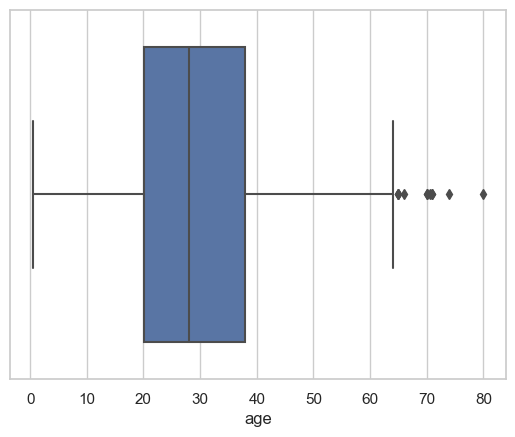

In [4]:
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset("titanic")
sns.set_theme(style = "whitegrid")

sns.boxplot(x=df["age"])


<AxesSubplot: xlabel='age', ylabel='class'>

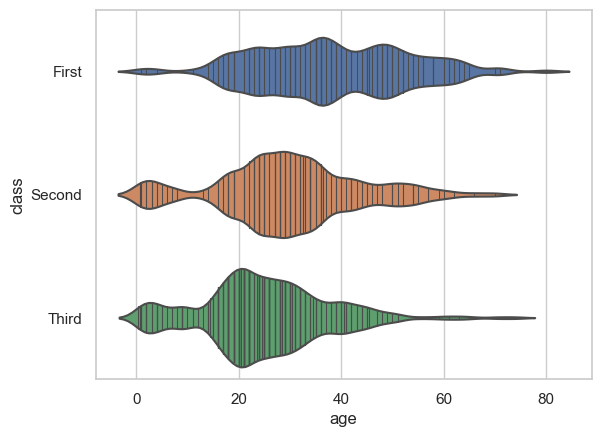

In [9]:
sns.violinplot(data=df, x='age', y= 'class', bw =.15, inner= "stick")

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# https://insights.stackoverflow.com/survey
# 스택오버플로우 자료를 가져올거임 
# 생각보다 None 값이 많다 

#ipynb가 존재하는 디렉토리에 data 디렉토리를 만들어 그 안에 데이터를 넣어놓았다 
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col='ResponseId')
schema_raw = pd.read_csv('data/survey_results_schema.csv', index_col="qname")["question"] #Series만 가지고 있을거임 question만 인덱싱 
# 스키마라는 것은 데이터에 대한 요약 정보임 (column에 대한 어떤 질문이었는 지를..)




In [14]:
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [15]:
schema_raw["CompTotal"] #series에서 인덱싱 하는 것임

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [16]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [45]:
survey_raw_df.info() #칼럼 개수 확인 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [18]:
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

In [46]:
selected_columns = [
    #인구통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용관련 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [27]:
survey_df = survey_raw_df[selected_columns].copy()# copy 해서 raw df를 건드리지 않고 별도의 데이터프레임을 만듦
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [28]:
def solution(cows, criterias):
    answer = 0
    return answer

In [29]:
def solution(n, k, customer_info, event_info):
    answer = []

    return answer

In [43]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


column(Series)이 NaN 값을 얼마나 갖는지 확인하기 위한 함수를 만들어봅시다

- series를 인자로 갖는 count_nan 함수를 만듭니다
- 인자로 전달된 series의 NaN 개수를 반환해줍니다

In [47]:
def count_nan(series:pd.Series):
    return len(series) - series.count()

print(count_nan(survey_df["YearsCode"]))

1937


YearsCode의 'Less than 1 year'의 값은 0으로 변경하고 'More than 50 years'의 값은 51로 일괄적으로 변경하려 합니다. 

또 dtype을 float로 변경하고 dlfmf survey_df["YearsCode"]에 적용해보세요 

아래의 Series메서드를 활용해보세요

힌트 : replace(변경 전 값, 변경 후 값, inplace = True)

In [51]:
survey_df['YearsCode']

<bound method NDFrame._add_numeric_operations.<locals>.all of ResponseId
1        NaN
2        NaN
3         14
4         20
5          8
        ... 
73264      8
73265      6
73266     42
73267     50
73268     16
Name: YearsCode, Length: 73268, dtype: object>

In [54]:

survey_df["YearsCode"].replace("Less than 1 year",0, inplace=True)

survey_df["YearsCode"].replace("More than 50 years",51, inplace=True)

survey_df["YearsCode"] = survey_df["YearsCode"].astype(float)
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20.0,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42.0,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [55]:
print(schema_raw["YearsCodePro"])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [56]:
count_nan(survey_df["YearsCodePro"])

21435

In [57]:
survey_df['YearsCodePro'].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [59]:

survey_df["YearsCodePro"].replace("Less than 1 year",0, inplace=True)

survey_df["YearsCodePro"].replace("More than 50 years",51, inplace=True)

survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype(float)
survey_df["YearsCodePro"]

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

In [60]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors ='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')

# pandas.to_numeric(arg, errors = 'raise', downcast = None)
# errors: {'ignore','raise','coerce',default 'raise'}

In [62]:
schema_raw["Gender"]
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

# 진짜 개골때리네

특정 문자 값이 포함되어 있는지 사용할 수 있는 메서드 contains()

첫 인자로 포함된 것을 찾을 문자열을 넣는다 

na 키워드 인수를 활용하면 NaN값을 대신할 값을 넣습니다.


```py
pandas.Series.str.contains(pat, case=True, flags=0, na = None, regex = True)
```


In [66]:
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [89]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#FFFFFF'




In [92]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts()

font_list = fm.findSystemFonts(fontpaths=None)
font_list
mpl.rcParams['font.family']
path = '/Users/minholee/Library/Fonts/NanumSquareR.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False


NanumSquare


In [75]:
schema_raw["Country"]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [76]:
survey_df["Country"].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [78]:
survey_df["Country"].nunique() #Nan 값이 포함되지 않은 개수

180

In [82]:
survey_df["Country"].value_counts()[:15]

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

In [85]:
country_df = survey_df["Country"].value_counts().head(15)

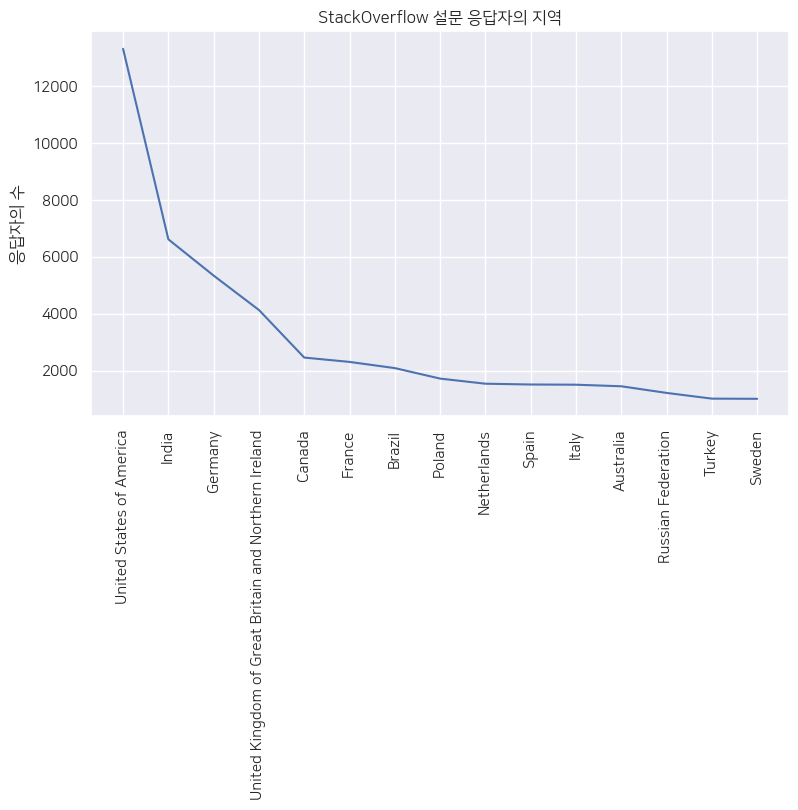

In [106]:
#xticks의 글자를 회전시키려면 rotation 키워드를 인수에 각도를 의미하는 정수값을 입력하면 된다
#Seaborn을 얹는 것임
plt.title("StackOverflow 설문 응답자의 지역")
plt.plot(country_df)
plt.ylabel("응답자의 수")
plt.xticks(rotation = 90)
plt.show()

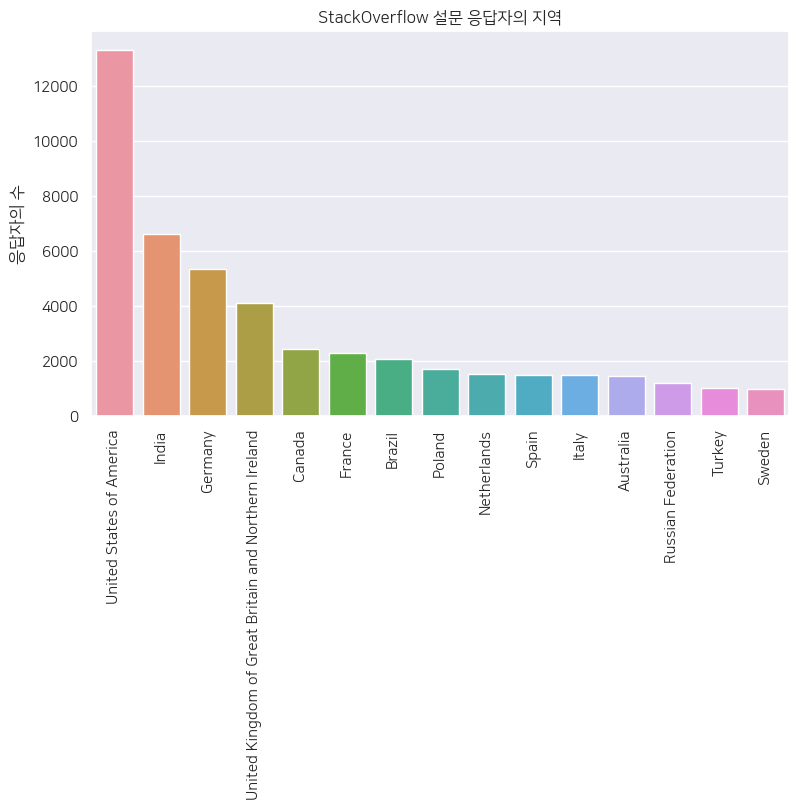

In [128]:
#xticks의 글자를 회전시키려면 rotation 키워드를 인수에 각도를 의미하는 정수값을 입력하면 된다
#Seaborn을 얹는 것임

#plt.figure(figsize=(12,6))
plt.title("StackOverflow 설문 응답자의 지역")
sns.barplot(x=country_df.index, y = country_df.values)
plt.ylabel("응답자의 수")
plt.xticks(rotation = 90)
plt.show()

In [111]:
schema_raw["Age"]

'What is your age?'

In [112]:
count_nan(survey_df['Age'])

3011

In [113]:
age_counts = survey_df["Age"].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [114]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [115]:
survey_df["Age"].nunique()

8

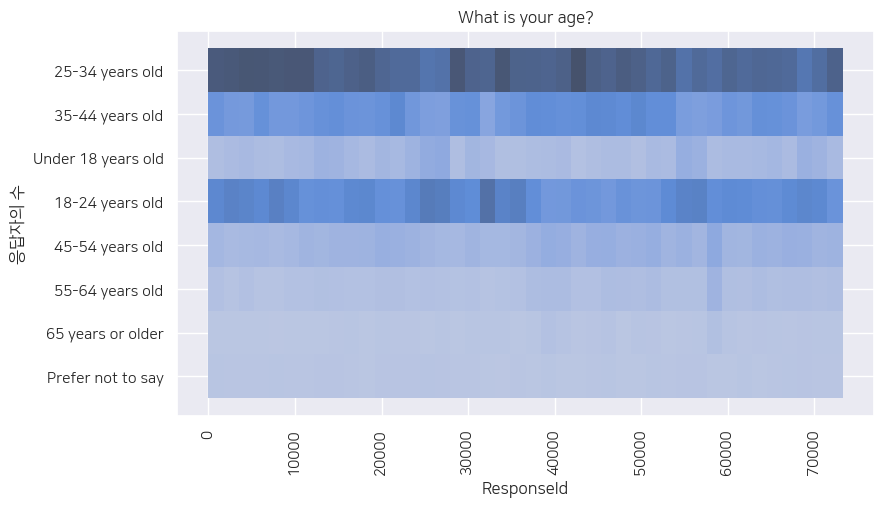

In [119]:
plt.title(schema_raw["Age"])
age_df = survey_df['Age']
sns.histplot(x=age_df.index, y = age_df.values)
plt.ylabel("응답자의 수")
plt.xticks(rotation = 90)
plt.show()

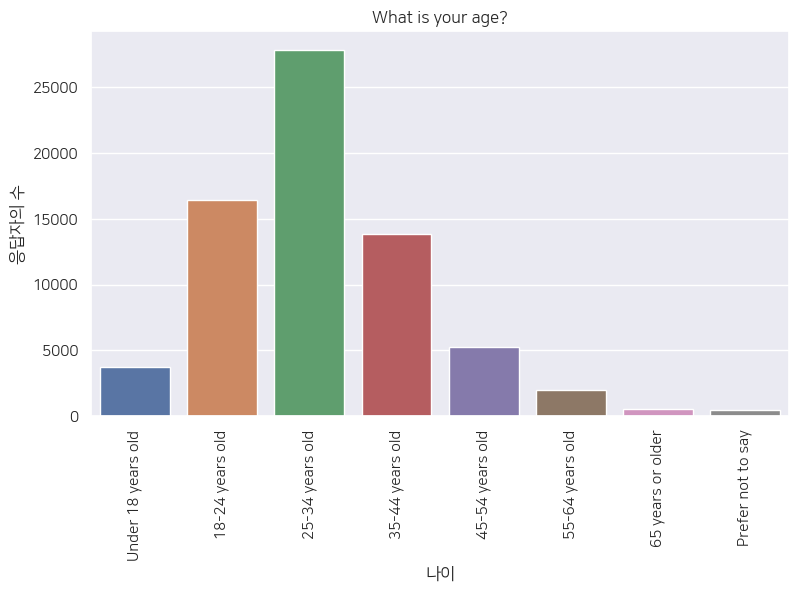

In [132]:
plt.title(schema_raw["Age"])
age_df = survey_df['Age']
age_order = ['Under 18 years old','18-24 years old', '25-34 years old', '35-44 years old', 
        '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say']
sns.countplot(x = age_df.values, order = age_order)
# sns.countplot(data=survey_df , x = "Age", order = age_order)

plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.xticks(rotation = 90)
plt.show()

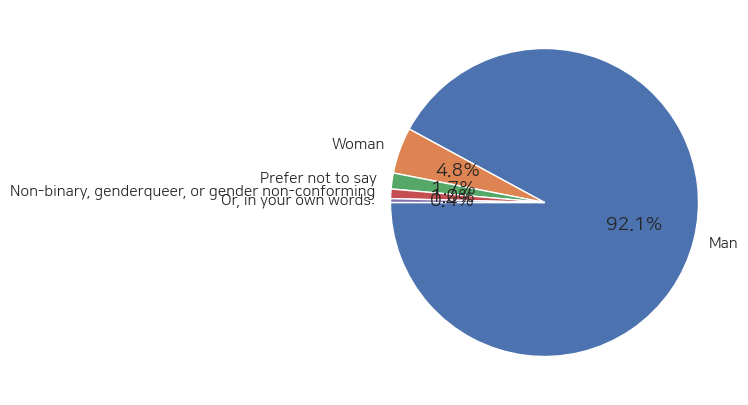

In [159]:
# where를 통해
# survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)
# 로 함 
gender_count = survey_df["Gender"].value_counts()

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=180)

plt.show()

In [160]:
schema_raw["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [182]:
EdLevel_count = survey_df["EdLevel"].value_counts()
EdLevel_count.index


Index(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Something else',
       'Professional degree (JD, MD, etc.)'],
      dtype='object')

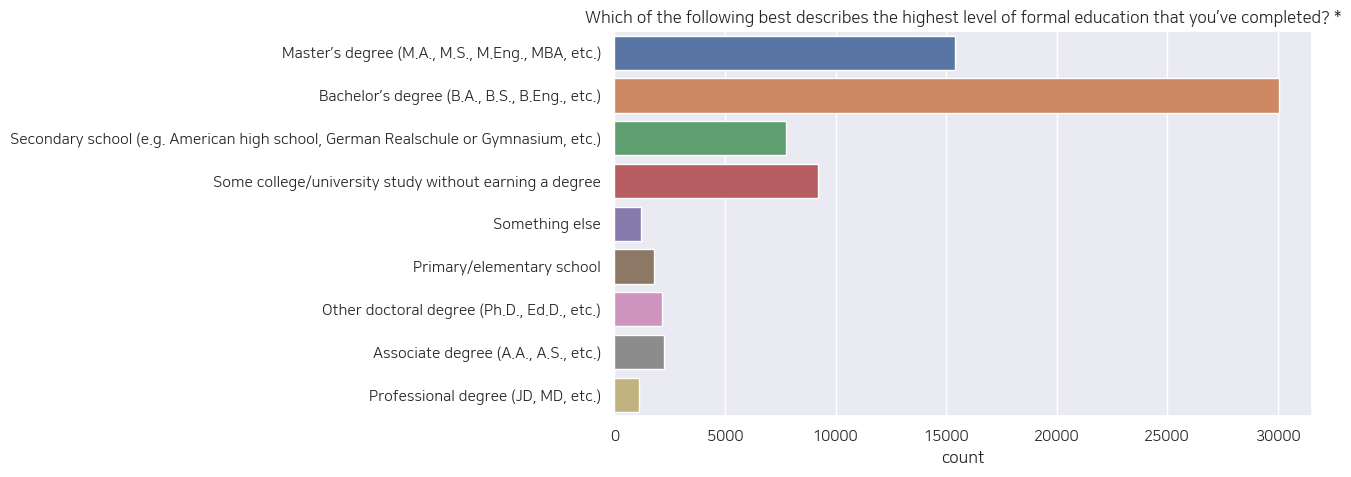

In [201]:
plt.title(schema_raw["EdLevel"])
sns.countplot(y=survey_df["EdLevel"].values)
plt.show()

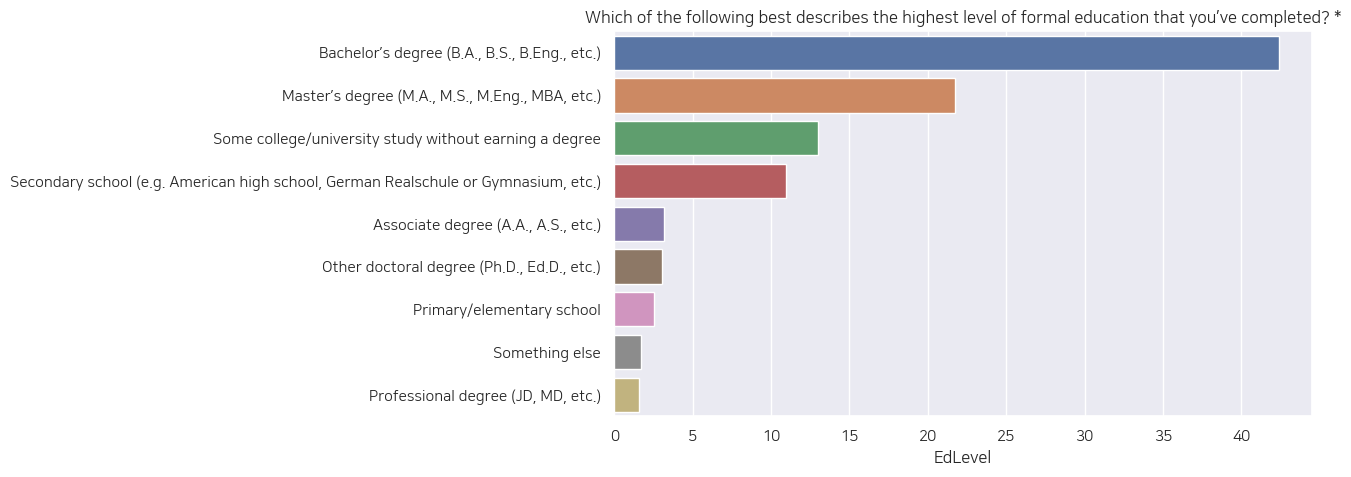

In [221]:
# x 축 순서 고려
# x 축 단위가 퍼센트 
plt.title(schema_raw["EdLevel"])
temp = survey_df["EdLevel"]
EdLevel_pct = survey_df.EdLevel.value_counts(True)*100
sns.barplot(x=EdLevel_pct, y=EdLevel_pct.index)
plt.ylabel(None)
plt.show()


In [222]:
schema_raw["Employment"]

'Which of the following best describes your current employment status?'

<AxesSubplot: xlabel='Employment'>

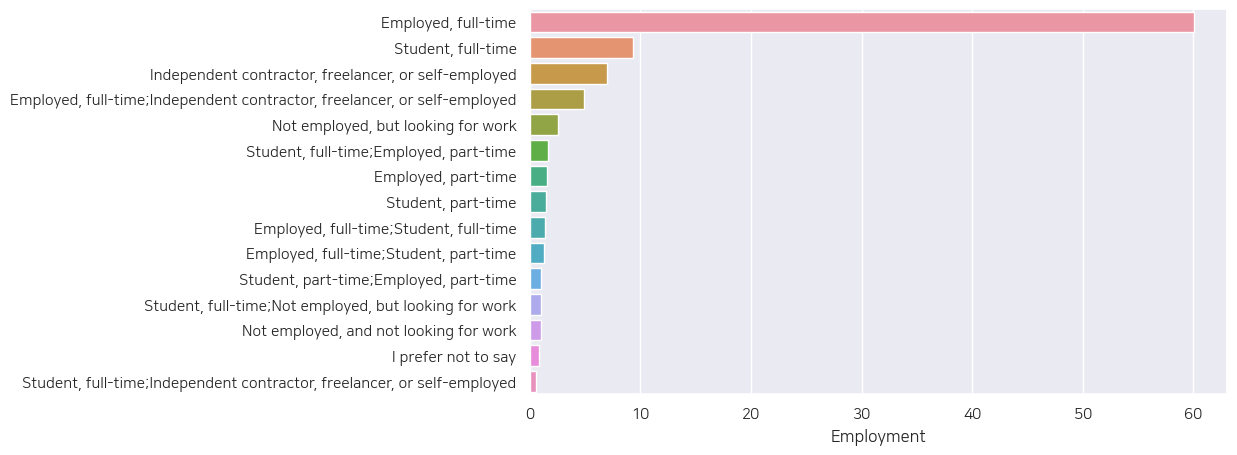

In [226]:
survey_df["Employment"].value_counts()
Employment_pct = (survey_df.Employment.value_counts(True, ascending=False)*100).head(15)

sns.barplot(x = Employment_pct, y=Employment_pct.index)